In [1]:
# Necessary Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [2]:
# Load data set
df = pd.read_excel('summarized_project_3.xlsx')
df

,Produkttyp,Year,Month,Produkttyp Name,Produzierte Einheiten,Arbeitskosten,Materialkosten,Overhead,Energiekosten,Zielgewinnspanne,Gesamtkosten,Durchschnittliche Kosten pro Einheit,Erforderlicher Verkaufspreis,Bruttogewinnspanne,Gesamtbruttogewinn,Gesamtnettogewinn
0,1,2020,1,Wi-Fi Smelly Socks Detector,3234,53859,4745,6421,12913,0.69,77938,24.099567,77.740539,0.69,173474.90,95536.90
1,1,2020,2,Wi-Fi Smelly Socks Detector,2360,40100,3689,3954,10156,0.69,57899,24.533475,79.140241,0.69,128871.97,70972.97
2,1,2020,3,Wi-Fi Smelly Socks Detector,7168,129729,8898,25794,10738,0.69,175159,24.436244,78.826595,0.69,389870.03,214711.03
3,1,2020,4,Wi-Fi Smelly Socks Detector,5420,108424,6906,18838,7840,0.69,142008,26.200738,84.518510,0.69,316082.32,174074.32
4,1,2020,5,Wi-Fi Smelly Socks Detector,2019,27118,2641,424,16035,0.69,46218,22.891530,73.843647,0.69,102872.32,56654.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,10,2022,8,CheeseStation,327,5916,4913,689,2939,0.97,14457,44.211009,1473.700306,0.97,467443.00,452986.00
356,10,2022,9,CheeseStation,154,3432,2508,1001,979,0.97,7920,51.428571,1714.285714,0.97,256080.00,248160.00
357,10,2022,10,CheeseStation,251,6906,3455,2722,0,0.97,13083,52.123506,1737.450199,0.97,423017.00,409934.00
358,10,2022,11,CheeseStation,376,10086,5551,2413,2451,0.97,20501,54.523936,1817.464539,0.97,662865.67,642364.67


### Insights per Products

In [3]:
# Create currency formatter

# Normal format
def currency_formatter(x, pos):   
    return f'{x:,.0f}'

# Millions format
def currency_formatter_milion(x, pos):
    return f'{int(x/1e6):,.0f} M'   

# Euro format
def currency_formatter_euro(x, pos):
    return f'{x:,.0f} €'

In [4]:
# Total produced units per product
produced_units = df.groupby('Produkttyp Name')[['Produzierte Einheiten']].sum().reset_index()
produced_units.sort_values(by='Produzierte Einheiten',ascending=False, inplace=True)
produced_units.reset_index(drop=True)


,Produkttyp Name,Produzierte Einheiten
0,Wi-Fi Smelly Socks Detector,146558
1,Virtual Reality Nose Hair Trimmer,144343
2,Selfie Toaster,143362
3,Robotic Pizza Butler,139014
4,Solar-Powered Rain Cloud,135960
5,Electric Toothbrush Karaoke Machine,127675
6,Bluetooth Banana Phone,120382
7,BananaBox,13663
8,Quantum Potato Computer,12409
9,CheeseStation,12096


In [5]:
# Create a dictionary to map each product to a specific color
product_color_mapping = {}

# Assign colors to products
for i, product in enumerate(produced_units['Produkttyp Name']):
    product_color_mapping[product] = sns.color_palette("Set1")[i % len(sns.color_palette("Set1"))]

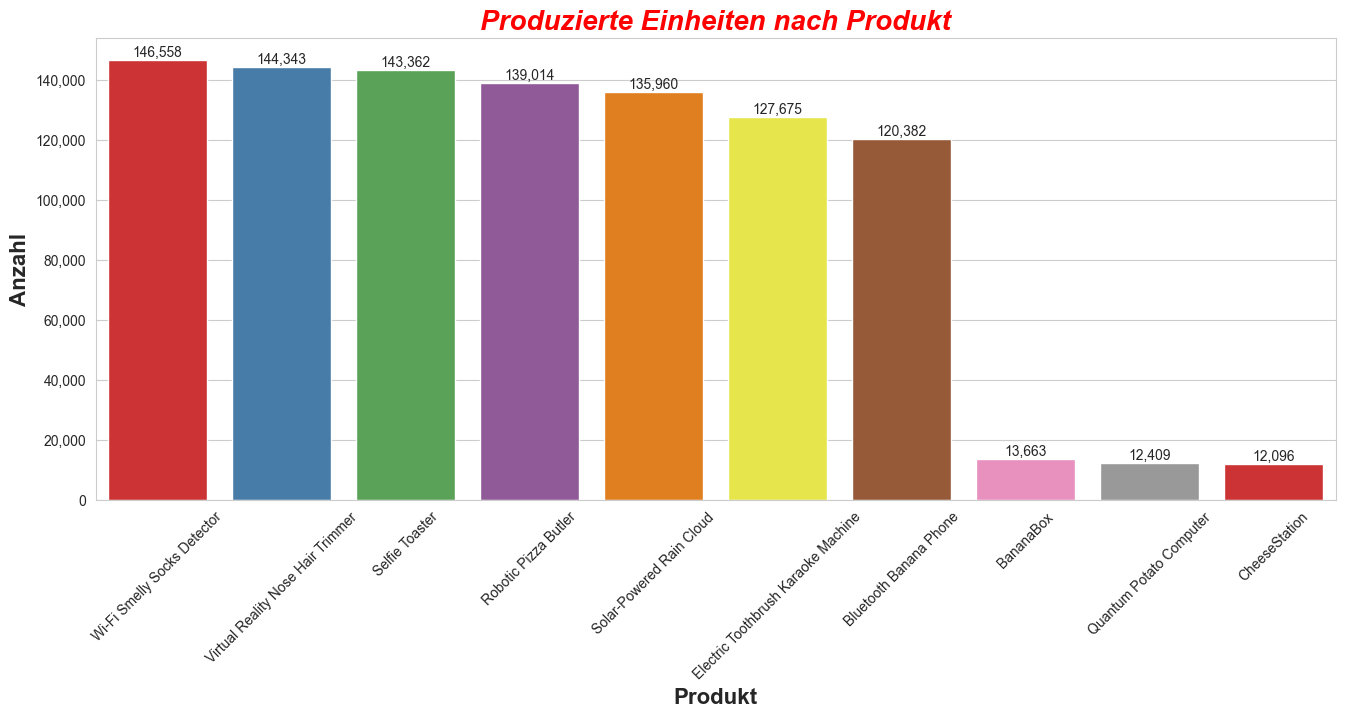

In [6]:
# Plot the total costs per product

plt.figure(figsize=(16,6))
ax = sns.barplot(data=produced_units, x='Produkttyp Name', y='Produzierte Einheiten', palette=product_color_mapping)

plt.title('Produzierte Einheiten nach Produkt', fontsize=20, style='italic', color='red', fontweight='bold')
plt.xlabel('Produkt', fontsize=16, fontweight='bold')
plt.ylabel('Anzahl', fontsize=16, fontweight='bold')

ax.yaxis.set_major_formatter(FuncFormatter(currency_formatter))

plt.xticks(rotation=45)

for i, cost in enumerate(produced_units['Produzierte Einheiten']):
    formatted_cost = '{:,.0f}'.format(cost)
    ax.annotate(text=formatted_cost,
                xy=(i, cost),
                ha='center', va='bottom')

plt.show()
#plt.savefig('plot_2\\plot1.png')

In [7]:
# Total Costs per Product
products_costs = df.groupby('Produkttyp Name')[['Gesamtkosten']].sum().reset_index()
products_costs.sort_values(by='Gesamtkosten',ascending=False, inplace=True)
products_costs.reset_index(drop=True)


,Produkttyp Name,Gesamtkosten
0,Wi-Fi Smelly Socks Detector,3532580
1,Virtual Reality Nose Hair Trimmer,3501989
2,Selfie Toaster,3460063
3,Solar-Powered Rain Cloud,3314105
4,Robotic Pizza Butler,3271641
5,Electric Toothbrush Karaoke Machine,3109275
6,Bluetooth Banana Phone,2877507
7,BananaBox,720111
8,Quantum Potato Computer,646546
9,CheeseStation,625377


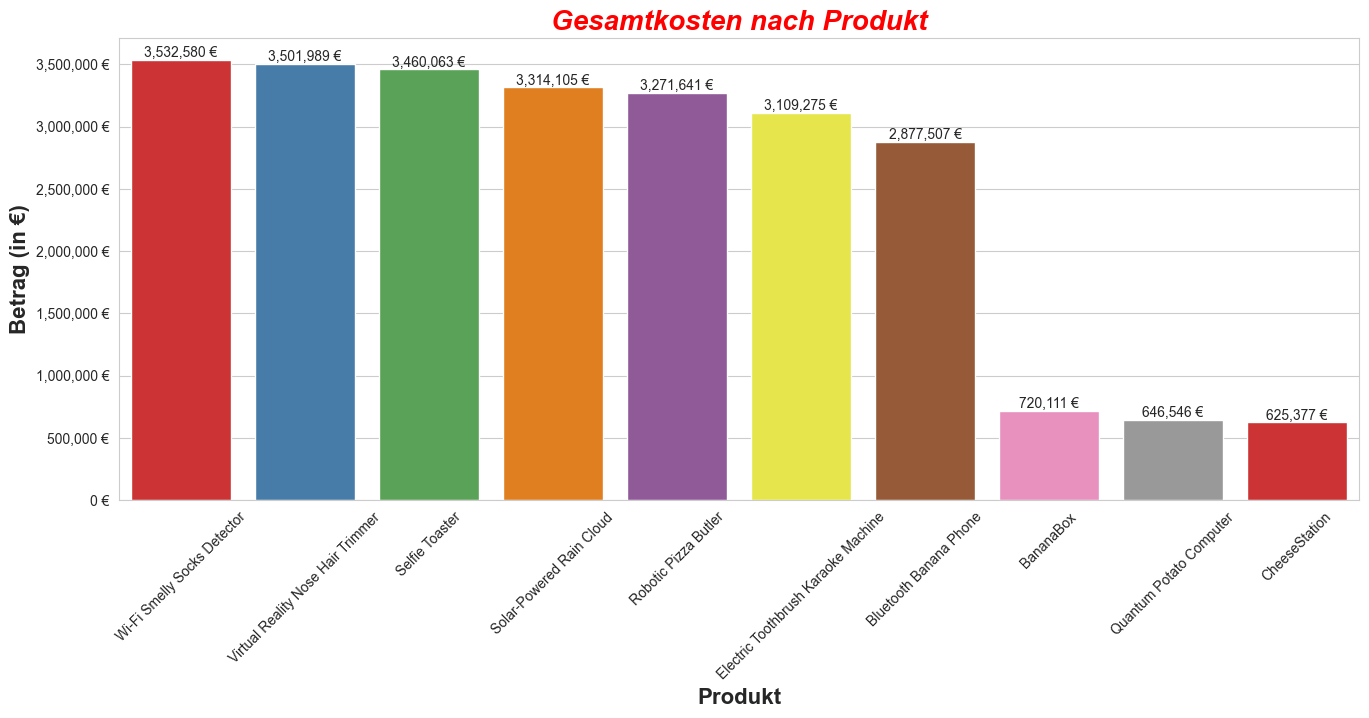

In [8]:
# Plot the total costs per product

plt.figure(figsize=(16,6))
ax = sns.barplot(data=products_costs, x='Produkttyp Name', y='Gesamtkosten', palette=product_color_mapping)

plt.title('Gesamtkosten nach Produkt', fontsize=20, style='italic', color='red', fontweight='bold')
plt.xlabel('Produkt', fontsize=16, fontweight='bold')
plt.ylabel('Betrag (in €)', fontsize=16, fontweight='bold')

ax.yaxis.set_major_formatter(FuncFormatter(currency_formatter_euro))

plt.xticks(rotation=45)

for i, cost in enumerate(products_costs['Gesamtkosten']):
    formatted_cost = '{:,.0f} €'.format(cost)
    ax.annotate(text=formatted_cost,
                xy=(i, cost),
                ha='center', va='bottom')

plt.show()
#plt.savefig('plot_2\\plot2.png')

In [9]:
# Total Brutto Profit 

products_bruto_profit = df.groupby('Produkttyp Name')[['Gesamtbruttogewinn']].sum().reset_index()
products_bruto_profit.sort_values(by='Gesamtbruttogewinn', ascending=False, inplace=True)
products_bruto_profit.reset_index(drop=True)

,Produkttyp Name,Gesamtbruttogewinn
0,Solar-Powered Rain Cloud,24303436.67
1,CheeseStation,20220522.97
2,Wi-Fi Smelly Socks Detector,7862839.33
3,Quantum Potato Computer,6537298.45
4,Virtual Reality Nose Hair Trimmer,3644927.34
5,Robotic Pizza Butler,2786953.45
6,Selfie Toaster,2404450.57
7,Bluetooth Banana Phone,1999623.53
8,BananaBox,1602827.73
9,Electric Toothbrush Karaoke Machine,234031.46


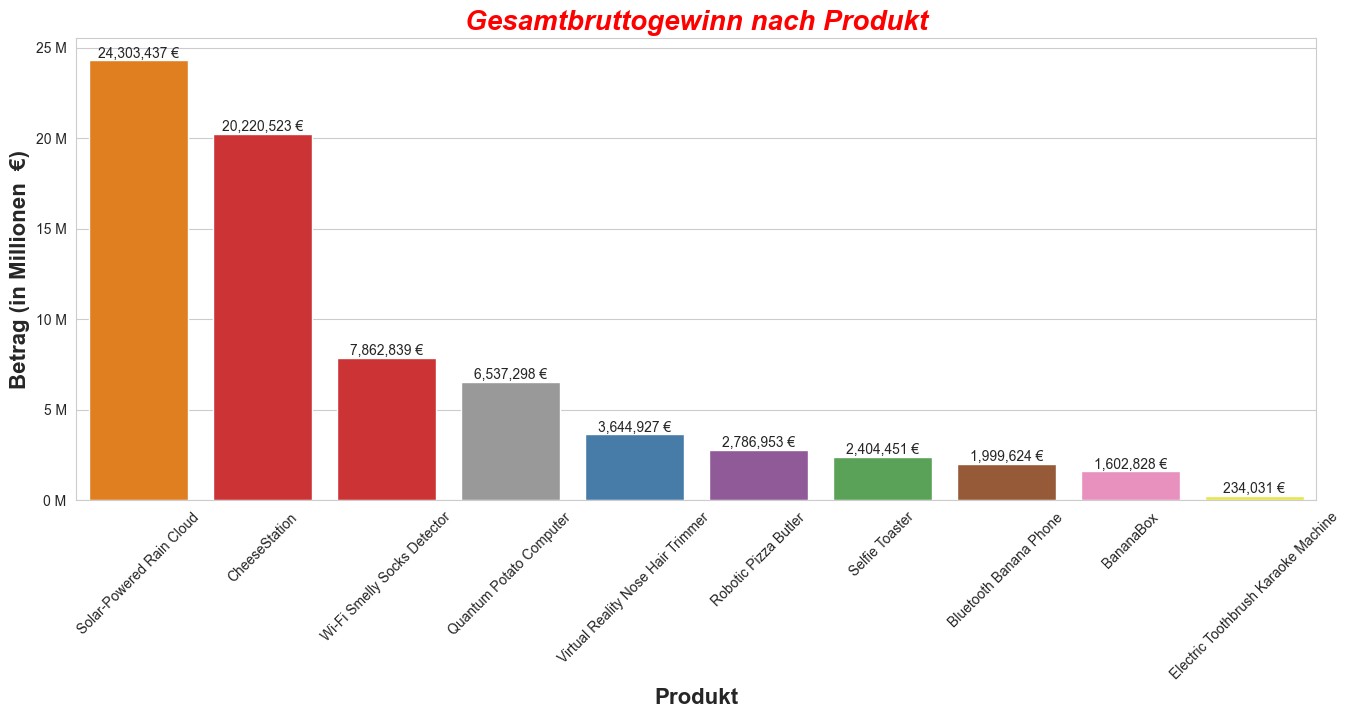

In [10]:
# Plot the total costs

plt.figure(figsize=(16,6))
ax = sns.barplot(data=products_bruto_profit, x='Produkttyp Name', y='Gesamtbruttogewinn', palette=product_color_mapping)

plt.title('Gesamtbruttogewinn nach Produkt', fontsize=20, style='italic', color='red', fontweight='bold')
plt.xlabel('Produkt', fontsize=16, fontweight='bold')
plt.ylabel('Betrag (in Millionen  €)', fontsize=16, fontweight='bold')

ax.yaxis.set_major_formatter(FuncFormatter(currency_formatter_milion))

plt.xticks(rotation=45)

for i, cost in enumerate(products_bruto_profit['Gesamtbruttogewinn']):
    formatted_cost = '{:,.0f} €'.format(cost)
    ax.annotate(text=formatted_cost,
                xy=(i, cost),
                ha='center', va='bottom')

plt.show()
#plt.savefig('plot_2\\plot3.png')

In [11]:
# Total Netto Profit or Loss

products_netto_profit = df.groupby('Produkttyp Name')[['Gesamtnettogewinn']].sum().reset_index()
products_netto_profit.sort_values(by='Gesamtnettogewinn', ascending=False, inplace=True)
products_netto_profit.reset_index(drop=True)

,Produkttyp Name,Gesamtnettogewinn
0,Solar-Powered Rain Cloud,20989331.67
1,CheeseStation,19595145.97
2,Quantum Potato Computer,5890752.45
3,Wi-Fi Smelly Socks Detector,4330259.33
4,BananaBox,882716.73
5,Virtual Reality Nose Hair Trimmer,142938.34
6,Robotic Pizza Butler,-484687.55
7,Bluetooth Banana Phone,-877883.47
8,Selfie Toaster,-1055612.43
9,Electric Toothbrush Karaoke Machine,-2875243.54


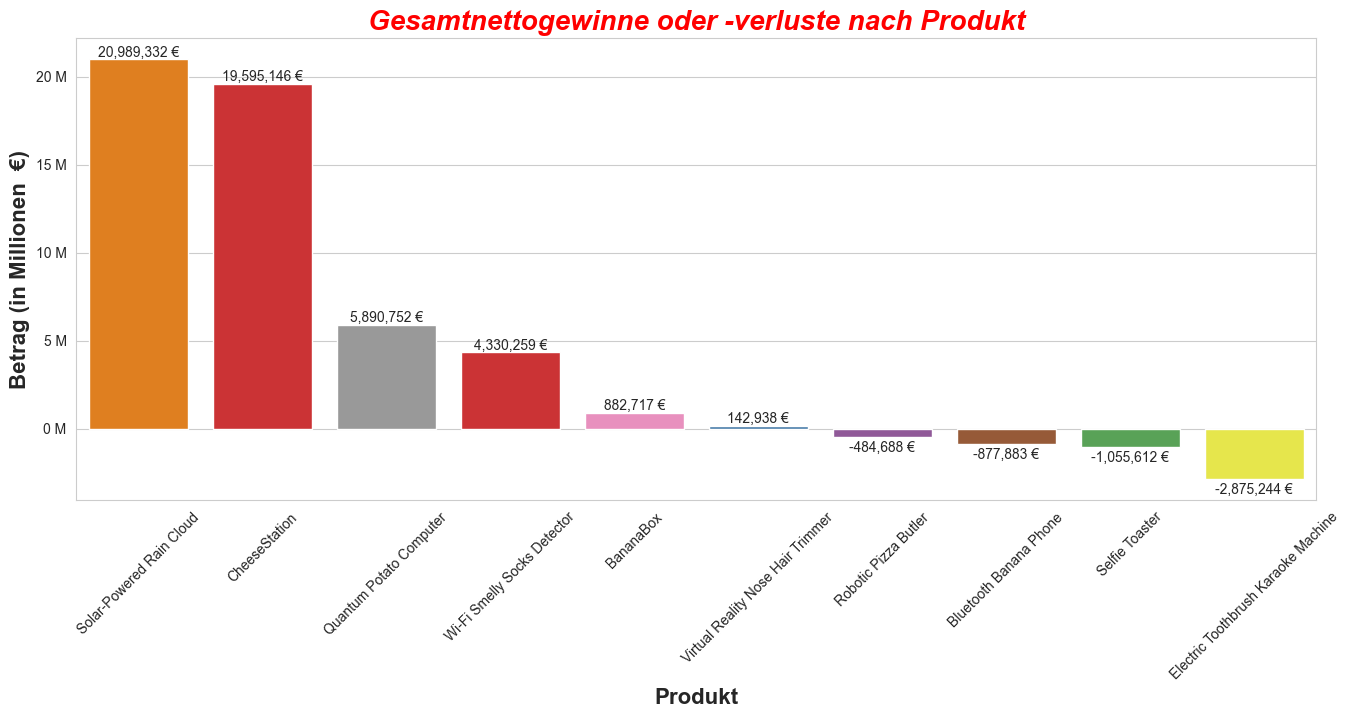

In [12]:
# Plot the total netto profits or loses 

plt.figure(figsize=(16, 6))
ax = sns.barplot(data=products_netto_profit, x='Produkttyp Name', y='Gesamtnettogewinn', palette=product_color_mapping)

plt.title('Gesamtnettogewinne oder -verluste nach Produkt', fontsize=20, style='italic', color='red', fontweight='bold')
plt.xlabel('Produkt', fontsize=16, fontweight='bold')
plt.ylabel('Betrag (in Millionen  €)', fontsize=16, fontweight='bold')

ax.yaxis.set_major_formatter(FuncFormatter(currency_formatter_milion))

plt.xticks(rotation=45)

for i, cost in enumerate(products_netto_profit['Gesamtnettogewinn']):
    formatted_cost = '{:,.0f} €'.format(cost)
    ax.annotate(text=formatted_cost,
                xy=(i, cost if cost>0 else cost-1e6),
                ha='center', va='bottom')

plt.show()
#plt.savefig('plot_2\\plot4.png')
